In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [2]:
train=pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
submission = pd.read_csv('sample_submission.csv')

In [3]:
print('train shape :', train.shape)
print('test shape :',test.shape)

train shape : (1458644, 11)
test shape : (625134, 9)


- ID - 각 여행에 대한 고유 식별자
- vendor_id - 여행 기록과 관련된 공급자를 나타내는 코드
- pickup_datetime - 미터가 종사한 날짜 및 시간
- dropoff_datetime - 미터가 분리된 날짜 및 시간
- passenger_count - 차량의 승객 수 (운전자가 값을 입력)
- pickup_longitude - 미터가 종사하는 경도
- pickup_latitude - 미터가 종사하는 위도
- dropoff_longitude - 미터가 분리 된 경도
- dropoff_latitude - 미터가 분리 된 위도
- store_and_fwd_flag - 이 플래그는 차량이 서버에 연결되지 않았기 때문에 공급 업체에 보내기 전에 여행 기록이 차량 메모리에 보관되었는지 여부를 나타냅니다.-Y = 저장 및 전달; N = 저장 및 전진 여행 아님
- trip_duration - 초 여행의 기간

In [4]:
train.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [5]:
print('########### train ##################')
print(train.info())

print('########### test ##################')
print(test.info())

########### train ##################
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB
None
########### test ##################
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 625134 entries, 0 to 625133
Data

In [6]:
print('############# train 결측치 ##############')
print(train.isnull().sum())

print('############# test 결측치 ##############')
print(test.isnull().sum())

############# train 결측치 ##############
id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64
############# test 결측치 ##############
id                    0
vendor_id             0
pickup_datetime       0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
dtype: int64


- 결측치는 모든 데이터에 없다.

In [7]:
print('####################### train ##################')
display(train.describe())

print('###################### test ###################')
display(test.describe())

####################### train ##################


,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02
std,4.987772e-01,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06


###################### test ###################


,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
count,625134.000000,625134.000000,625134.000000,625134.000000,625134.000000,625134.000000
mean,1.534884,1.661765,-73.973614,40.750927,-73.973458,40.751816
std,0.498782,1.311293,0.073389,0.029848,0.072565,0.035824
min,1.000000,0.000000,-121.933128,37.389587,-121.933327,36.601322
25%,1.000000,1.000000,-73.991852,40.737392,-73.991318,40.736000
50%,2.000000,1.000000,-73.981743,40.754093,-73.979774,40.754543
75%,2.000000,2.000000,-73.967400,40.768394,-73.963013,40.769852
max,2.000000,9.000000,-69.248917,42.814938,-67.496796,48.857597


In [8]:
train['pickup_datetime'] = pd.to_datetime(train['pickup_datetime'])
train['dropoff_datetime'] = pd.to_datetime(train['dropoff_datetime'])
test['pickup_datetime'] = pd.to_datetime(test['pickup_datetime'])

# trip_duration을 target으로 바꿔준다.
train=train.rename(columns = {'trip_duration':'target'})

In [9]:
def sub_function(x):
    a=set(train[x].unique())
    b =set(test[x].unique())
    a =a.difference(test[x])
    b =b.difference(train[x])
    print(f'train_set 에만 있는 값 {a}')
    print(f'test_set 에만 있는 값 {b}')    

<AxesSubplot:xlabel='target', ylabel='Density'>

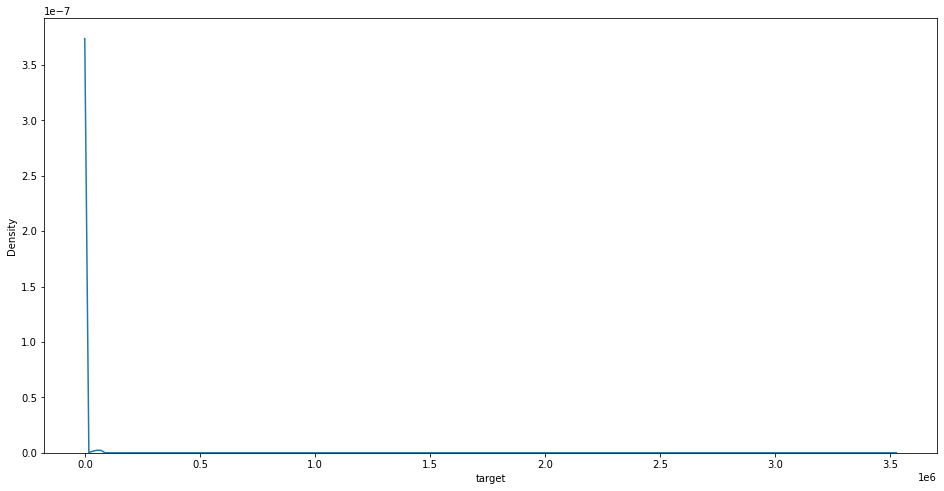

In [10]:
# target에 정규화를 시켜주고 분석을 진행해 주자.
plt.figure(figsize = (16,8))
sns.kdeplot(train['target'])

## vendor_id

In [11]:
train.vendor_id.value_counts()

2    780302
1    678342
Name: vendor_id, dtype: int64

<AxesSubplot:xlabel='vendor_id', ylabel='target'>

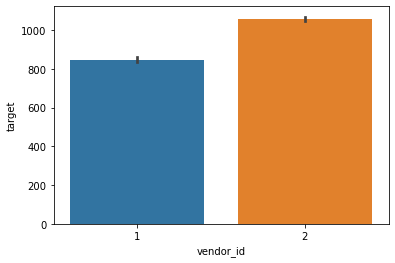

In [12]:
sns.barplot(data = train, x = 'vendor_id', y = 'target')

In [13]:
sub_function('vendor_id')

train_set 에만 있는 값 set()
test_set 에만 있는 값 set()


- 이 데이터의 경우 설명도 나와 있지 않기 때문에 나중에 다른 변수와 비교할 때 사용해야 겠다.

## passenger_count

In [14]:
print('train의 passenger_count')
print(train['passenger_count'].value_counts())
print('test의 passenger_count')
print(test['passenger_count'].value_counts())

train의 passenger_count
1    1033540
2     210318
5      78088
3      59896
6      48333
4      28404
0         60
7          3
9          1
8          1
Name: passenger_count, dtype: int64
test의 passenger_count
1    443447
2     90027
5     33411
3     25686
6     20521
4     12017
0        23
9         2
Name: passenger_count, dtype: int64


<AxesSubplot:xlabel='passenger_count', ylabel='target'>

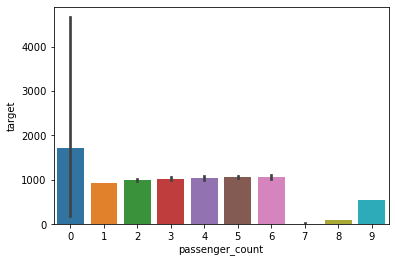

In [15]:
sns.barplot(data = train, x = 'passenger_count', y = 'target')

- 0명을 태웠다는 말은 무슨말일까?
- 일단 test셋에 7과 8이 없음으로 7과 8의 데이터를 지워주도록 하자!!

## pickup_datetime

In [16]:
def datetime(df, column):
    df['month'] = df[column].dt.month
    df['day'] = df[column].dt.day
    df['hour'] = df[column].dt.hour
    return df

In [17]:
train=datetime(df = train, column = 'pickup_datetime')
test=datetime(df = test, column = 'pickup_datetime')

In [18]:
# 주말과 평일을 나누어서 데이터를 분석해 보자.
train['weekday'] = train['pickup_datetime'].apply(lambda x:x.weekday())
train['weekday']=train['weekday'].apply(lambda x: 1 if x > 4 else 0)

test['weekday'] = test['pickup_datetime'].apply(lambda x:x.weekday())
test['weekday']=test['weekday'].apply(lambda x: 1 if x > 4 else 0)


### 평일과 공휴일의 차이

Text(0.5, 1.0, 'weekday vs target')

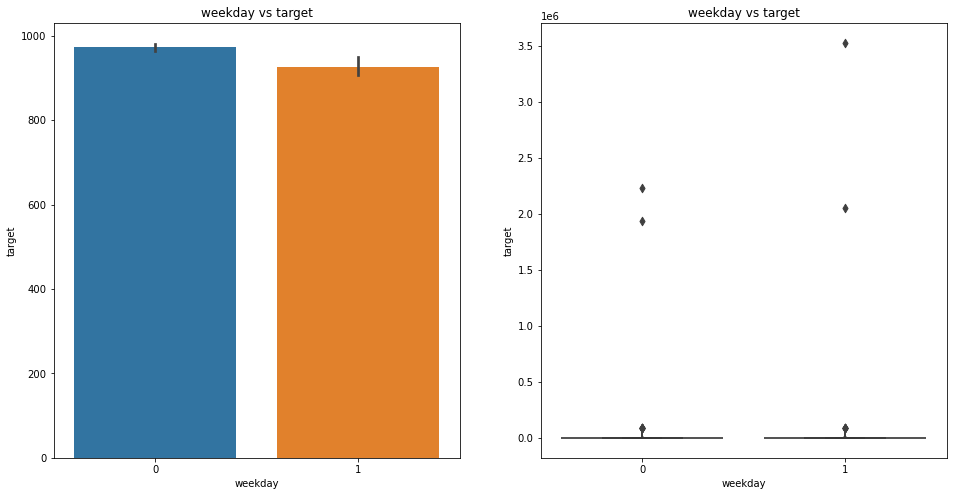

In [19]:
fig, ax = plt.subplots(ncols = 2, figsize = (16,8))
sns.barplot(data = train, x = 'weekday', y = 'target', ax = ax[0])
ax[0].set_title('weekday vs target')

sns.boxenplot(data = train, x = 'weekday', y = 'target', ax = ax[1])
ax[1].set_title('weekday vs target')

- 사람들은 평일에 택시를 더 많이 타는 것을 알 수있다.

### 월별로 차이

Text(0.5, 1.0, 'month vs target')

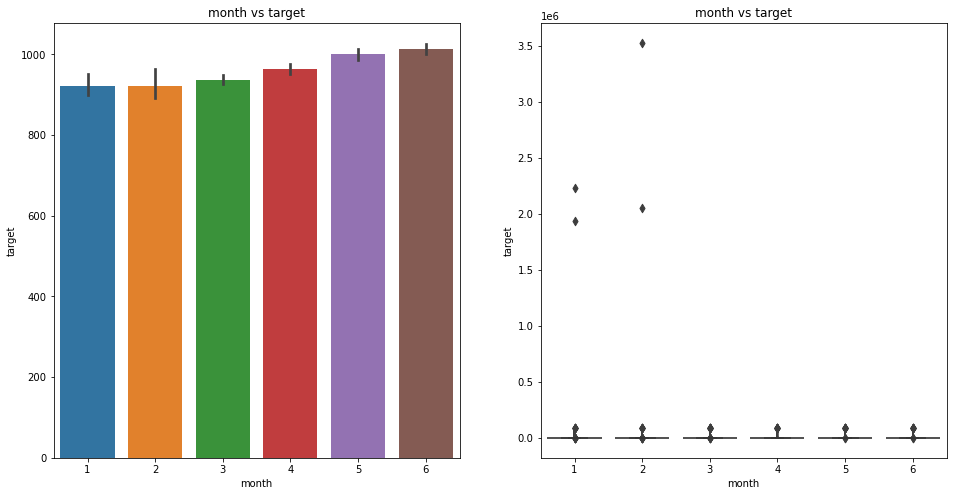

In [20]:
fig, ax = plt.subplots(ncols = 2, figsize = (16,8))
sns.barplot(data = train, x = 'month', y = 'target', ax = ax[0])
ax[0].set_title('month vs target')

sns.boxenplot(data = train, x = 'month', y = 'target', ax = ax[1])
ax[1].set_title('month vs target')

- 매 달마다 택시를 타는 사람이 늘어나고 있다.

In [21]:
sub_function('month')

train_set 에만 있는 값 set()
test_set 에만 있는 값 set()


### 일별로 차이

<AxesSubplot:xlabel='day', ylabel='target'>

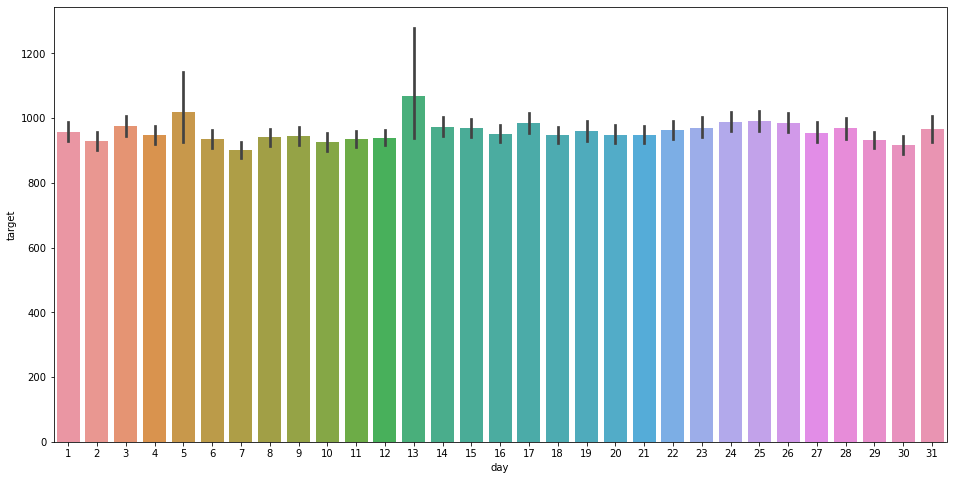

In [22]:
plt.figure(figsize = (16,8))
sns.barplot(data = train, x = 'day', y = 'target')

- 일별로는 다른 차이점을 발견하지 못했다.

In [23]:
sub_function('day')

train_set 에만 있는 값 set()
test_set 에만 있는 값 set()


<AxesSubplot:xlabel='hour', ylabel='target'>

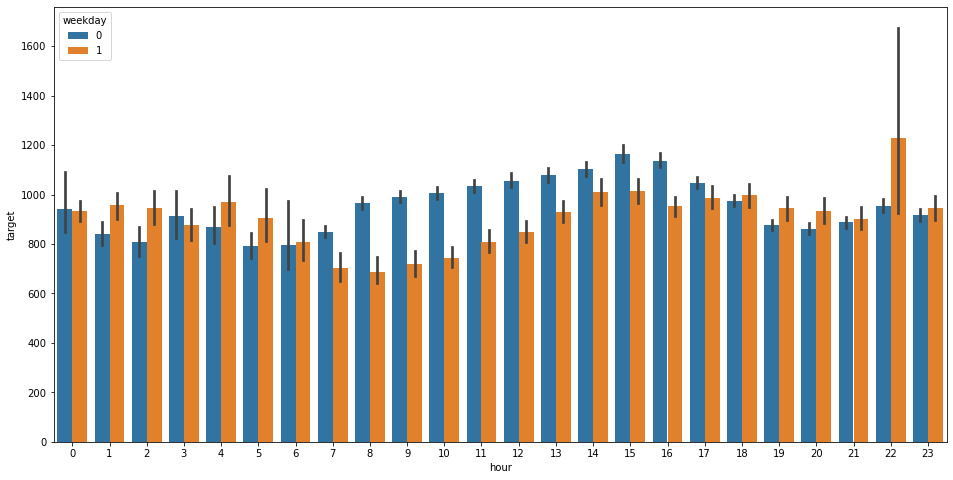

In [24]:
plt.figure(figsize = (16,8))
sns.barplot(data = train, x = 'hour', y = 'target', hue = 'weekday')

- 시간별로 공휴일인지 아닌지는 차이가 있는 것 같다.

## 위도 경도를 이용해 거리 구하기

In [25]:
from haversine import haversine

In [26]:
train.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag', 'target',
       'month', 'day', 'hour', 'weekday'],
      dtype='object')

In [27]:
def haversine1(df):
    a = []
    b = []
    for i in df.index:
        a.append((df.loc[i,'pickup_longitude'],df.loc[i,'pickup_latitude']))
        b.append((df.loc[i,'dropoff_longitude'],df.loc[i,'dropoff_latitude']))
    distance = []
    for k in zip(a,b):
        distance.append(haversine(k[0], k[1], unit = 'km'))
        
    return distance

In [28]:
distance_train=haversine1(train)
distance_train=pd.DataFrame(distance_train)

distance_test = haversine1(test)
distance_test = pd.DataFrame(distance_test)

In [29]:
train=pd.concat([train,distance_train], axis = 1)
test = pd.concat([test, distance_test], axis = 1)

In [30]:
train=train.rename(columns = {0:'distance'})
test = test.rename(columns = {0:'distance'})

In [31]:
# train['target'] = train['target'].apply(lambda x: np.log(x))

<AxesSubplot:xlabel='distance', ylabel='target'>

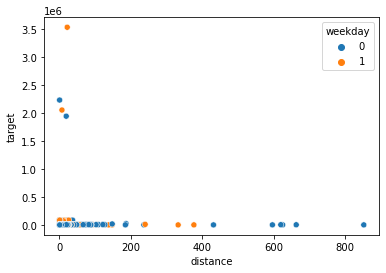

In [32]:
sns.scatterplot(data = train, x = 'distance', y = 'target', hue = 'weekday')

In [33]:
train[['distance','target']].corr()

,distance,target
distance,1.000000,0.091125
target,0.091125,1.000000


## store_and_fwd_flag

In [34]:
train['store_and_fwd_flag'].value_counts()

N    1450599
Y       8045
Name: store_and_fwd_flag, dtype: int64

<AxesSubplot:xlabel='store_and_fwd_flag', ylabel='target'>

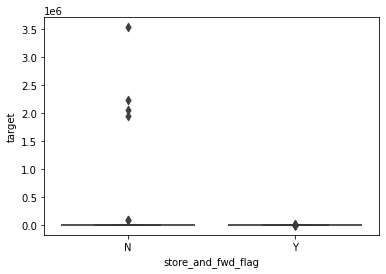

In [35]:
sns.boxenplot(data = train, x = 'store_and_fwd_flag', y = 'target')

- Y가 N보다 더 높은 시간은 나타낸다.

In [36]:
sub_function('store_and_fwd_flag')

train_set 에만 있는 값 set()
test_set 에만 있는 값 set()


<AxesSubplot:xlabel='store_and_fwd_flag', ylabel='target'>

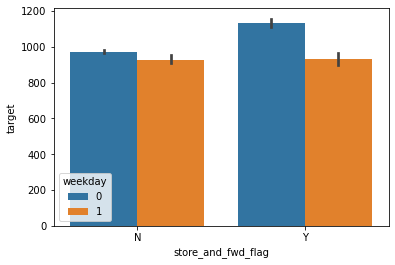

In [37]:
sns.barplot(data = train, x = 'store_and_fwd_flag', y = 'target', hue = 'weekday')

<AxesSubplot:>

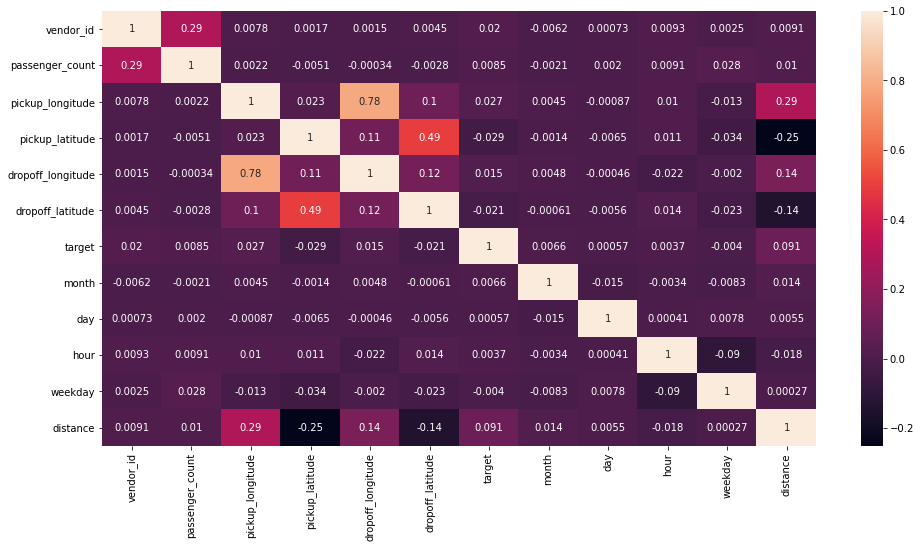

In [38]:
plt.figure(figsize = (16,8))
train_corr=train.corr()
sns.heatmap(train_corr, annot = True)

In [39]:
# import folium

In [40]:
# start=train[['pickup_latitude','pickup_longtitude']]
# g_map = folium.Map(location = [73.982155,40.767937], zoom_start = 18)
# for start in zip(train['pickup_longitude'], train['pickup_latitude']):
#     start = list(start)
#     marker=folium.Marker(start, popup = 'campus seven', icon = folium.Icon(color = 'blue'))
#     marker.add_to(g_map)

<AxesSubplot:xlabel='distance', ylabel='Density'>

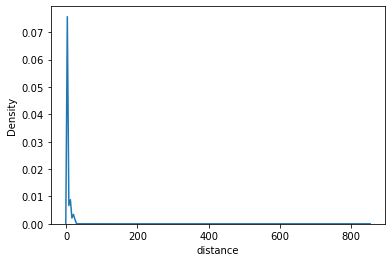

In [41]:
sns.kdeplot(train['distance'])

<AxesSubplot:xlabel='distance', ylabel='Density'>

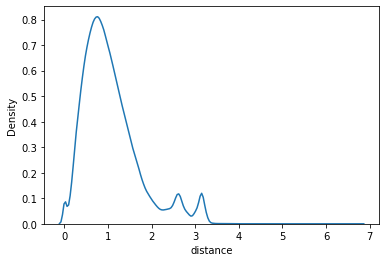

In [42]:
# distance에 정규화를 시켜주자.
train['distance']=train['distance'].apply(lambda x:np.log1p(x))
test['distance'] = test['distance'].apply(lambda x:np.log1p(x))
sns.kdeplot(train['distance'])
# 그래프를 보고 나눠주려고 했지만 나눠줄 방법을 찾지 못했다.

In [43]:
test['distance'].describe()

count    625134.000000
mean          1.067779
std           0.656287
min           0.000000
25%           0.613279
50%           0.927882
75%           1.346734
max           6.658587
Name: distance, dtype: float64

In [44]:
# 그래서 거리의 사분위수를 이용해 나눠주기로 하자.
train['distance'].describe()

train.loc[train['distance'] <= 0.6138352 , 'distance_binning'] = 0
train.loc[(train['distance'] >=0.6138352) & (train['distance'] < 0.9286977), 'distance_binning'] = 1
train.loc[(train['distance'] >= 0.9286977) & (train['distance'] <1.347212 ), 'distance_binning'] = 2
train.loc[train['distance'] >= 1.347212, 'distance_binning'] = 3

test.loc[test['distance'] <= 0.6138352 , 'distance_binning'] = 0
test.loc[(test['distance'] >=0.6138352) & (test['distance'] < 0.9286977), 'distance_binning'] = 1
test.loc[(test['distance'] >= 0.9286977) & (test['distance'] <1.347212 ), 'distance_binning'] = 2
test.loc[test['distance'] >= 1.347212, 'distance_binning'] = 3

<AxesSubplot:xlabel='distance_binning', ylabel='target'>

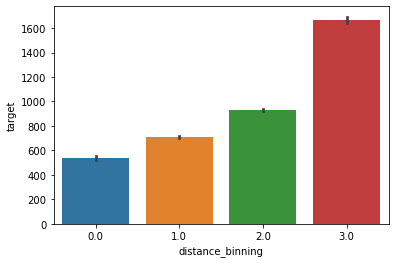

In [45]:
sns.barplot(data = train, x = 'distance_binning', y = 'target')

- 변수마다 연관이 있는 걸로 보여진다.

In [46]:
delete_index=train[(train['passenger_count'] == 7)|(train['passenger_count'] == 8)].index
train=train.drop(delete_index,axis = 0)

sub_function('passenger_count')

train_set 에만 있는 값 set()
test_set 에만 있는 값 set()


In [47]:
train['target'].describe()
train['target_binning']=pd.qcut(train['target'],4, labels = [0,1,2,3])

<AxesSubplot:xlabel='hour', ylabel='distance'>

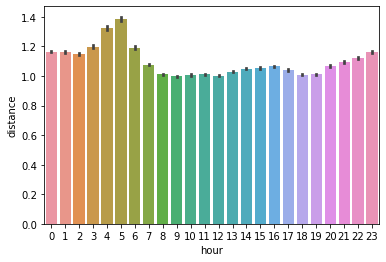

In [48]:
# 3~5시 사이에 높은 이동량을 보인다.
sns.barplot(data = train, x = 'hour', y = 'distance')

<AxesSubplot:xlabel='month', ylabel='distance'>

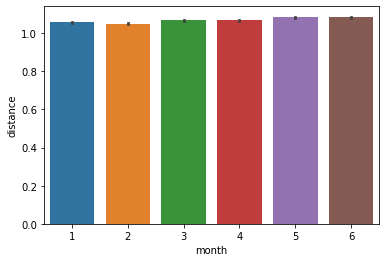

In [49]:
# 눈이 오거나 안오거나에 따라서 거리에 차이가 있을 것 같다.
sns.barplot(data = train, x = 'month', y = 'distance')

# 즉, 눈이 올 시기인 1~2월에는 차들이 좀 더 서행운전을 하기 때문에 목적지에 더 늦게 도착할 것 같다.

### 가정 1 : 날씨가 추운 1~2월은 적은 거리도 추운 날씨 때문에 택시를 탈 것이다.

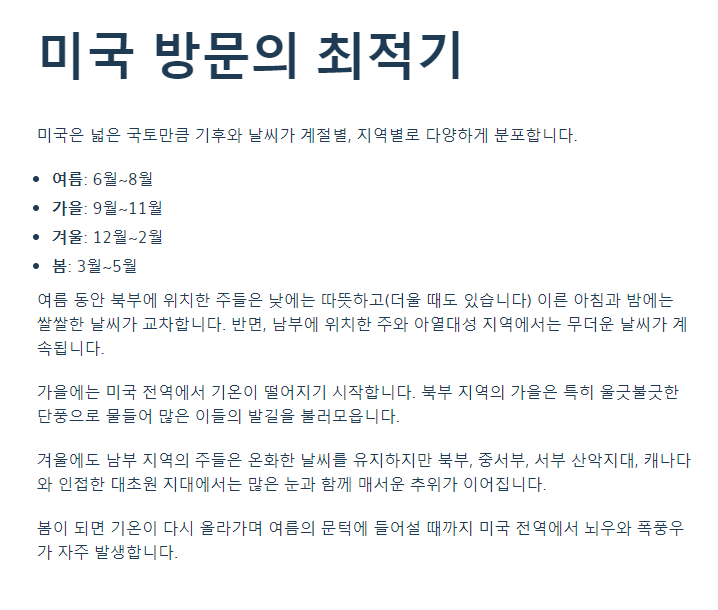

- 변수 0 :1~2월은 겨울인 달
- 변수 1 :3~6월은 겨울이 아닌 달

In [52]:
train['cold'] = 1
train.loc[(train['month'] == 1) | (train['month'] == 2), 'cold'] = 0

test['cold'] = 1
test.loc[(test['month'] == 1) | (test['month'] == 2), 'cold'] = 0

In [54]:
train.cold.value_counts()

1    990634
0    468006
Name: cold, dtype: int64

<AxesSubplot:xlabel='cold', ylabel='target'>

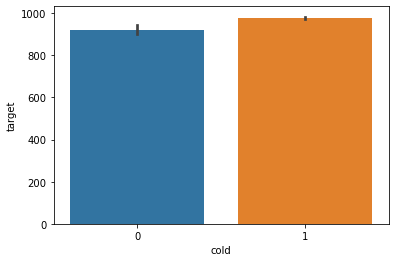

In [55]:
sns.barplot(data = train, x = 'cold', y = 'target')

### 가정 2 :  평일의 일하는 시간대, 일하지 않는 시간대, 주말 이렇게 비교해보도록 하자.
### 2. 일하는 시간대에 사람들이 가장 많이 활동하는 시간대 임으로 도로상황을 고려하여 차를 오래 탄다고 생각한다.
### 1. 주말에 놀러 나가는 사람들이 많으나 일하는 시간대에 비해 차가 안막힌다고 가정한다.
### 0. 평일 일하지 않는 시간대에는 차가 막히지 않으므로 택시를 타고 있는 시간이 적다고 가정했다.

<AxesSubplot:xlabel='hour', ylabel='target'>

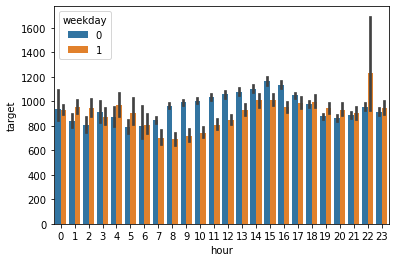

In [56]:
sns.barplot(data = train, x=  'hour', y = 'target', hue = 'weekday')

In [57]:
train.loc[(train['weekday'] == 0), 'working'] = 0
train.loc[train['weekday'] == 1,'working'] = 1
train.loc[(train['weekday'] == 0) & (8 <= train['hour']) & (train['hour'] <= 18), 'working'] = 2

test.loc[(test['weekday'] == 0), 'working'] = 0
test.loc[test['weekday'] == 1,'working'] = 1
test.loc[(test['weekday'] == 0) & (8 <= test['hour']) & (test['hour'] <= 18), 'working'] = 2

<AxesSubplot:xlabel='working', ylabel='target'>

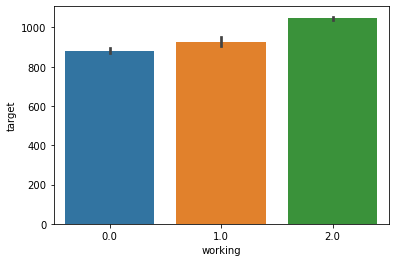

In [58]:
sns.barplot(data = train, x = 'working', y = 'target')

- 유의미한 변수가 될 것 같다.
- 이 변수는 더미화를 시켜주지 않고 넣어주도록 하자.

## 모델링

In [59]:
dummies=['vendor_id','store_and_fwd_flag','month','hour','weekday','distance_binning','passenger_count']
data = pd.get_dummies(data = train[dummies], columns = dummies )
data=pd.concat([data,train['working'], train['cold']], axis =1)

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error
from xgboost import XGBRFRegressor, XGBRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor

In [61]:
# 평가 지표
from sklearn.metrics import make_scorer
def rmsle(predicted_values, actual_values):
    # 넘파이로 배열 형태로 바꿔줌.  
    predicted_values = np.array(predicted_values)
    actual_values = np.array(actual_values)
    
    # 예측값과 실제 값에 1을 더하고 로그를 씌어줌 
    log_predict = np.log(predicted_values + 1)
    log_actual = np.log(actual_values + 1)
    
    # 위에서 계산한 예측값에서 실측값을 빼주고 제곱해줌
    difference = log_predict - log_actual
    difference = np.square(difference)
    
    # 평균을 냄
    mean_difference = difference.mean()
    
    # 다시 루트를 씌움
    score = np.sqrt(mean_difference)  
    
    return score

In [62]:
# min(list(score.values()))

In [63]:
# for key, values in score.items():
#     value=min(score.values())
#     if value == values:
#         best_model = key

## test data

In [64]:
test['distance'].describe()

count    625134.000000
mean          1.067779
std           0.656287
min           0.000000
25%           0.613279
50%           0.927882
75%           1.346734
max           6.658587
Name: distance, dtype: float64

In [65]:
test_dummies=pd.get_dummies(test[dummies], columns = dummies)
test_data = pd.concat([test_dummies, test['working'], test['cold']], axis = 1)

In [66]:
from tqdm import tqdm
models = {'lgb':LinearRegression(),'Ridge':Ridge(),'Lasso':Lasso(),
          'cat':CatBoostRegressor(),'lightgbm':LGBMRegressor(),'xgbRF':XGBRFRegressor()}
X_train, X_test, y_train, y_test = train_test_split(data, train['target'], test_size = 0.2, random_state = 42)
def modeling(models,df = None, target = None, test_data = None):
    circle = {}
    X_train, X_test, y_train, y_test = train_test_split(df, target, test_size = 0.2, random_state = 42)
    for model in tqdm(models):
        models[model].fit(X_train,y_train)
        y_pred=models[model].predict(X_test)
#         score=rmsle(y_pred,y_test)
        circle[model] = y_pred
    score = circle
    model_value = pd.DataFrame()
    for key, value in score.items():
        model_value[key] = value
    
    xgb =XGBRegressor()
    xgb.fit(model_value, y_test)
    
    # train으로 stacking 모델을 만들어 놓고 test를 넣어주자.
    final_score = {}
    for model in tqdm(models):
        y_pred=models[model].predict(test_data)
        final_score[model] = y_pred
    model_value = pd.DataFrame()
    for key, value in final_score.items():
        model_value[key] = value
        
    final_predict=xgb.predict(model_value)
    
    return final_predict

In [67]:
final_predict=modeling(models,df = data, target = train['target'], test_data = test_data)

 50%|██████████████████████████████████████████                                          | 3/6 [00:22<00:27,  9.07s/it]

Learning rate set to 0.137194
0:	learn: 5629.0642792	total: 271ms	remaining: 4m 30s
1:	learn: 5625.3901997	total: 414ms	remaining: 3m 26s
2:	learn: 5622.4256332	total: 570ms	remaining: 3m 9s
3:	learn: 5620.4464781	total: 722ms	remaining: 2m 59s
4:	learn: 5618.9226359	total: 896ms	remaining: 2m 58s
5:	learn: 5617.8023629	total: 1.06s	remaining: 2m 55s
6:	learn: 5616.9446633	total: 1.22s	remaining: 2m 53s
7:	learn: 5616.3019559	total: 1.37s	remaining: 2m 49s
8:	learn: 5614.0616885	total: 1.53s	remaining: 2m 48s
9:	learn: 5613.6786488	total: 1.69s	remaining: 2m 47s
10:	learn: 5613.3709606	total: 1.83s	remaining: 2m 44s
11:	learn: 5611.8491947	total: 1.96s	remaining: 2m 41s
12:	learn: 5610.4819433	total: 2.08s	remaining: 2m 37s
13:	learn: 5610.3140515	total: 2.19s	remaining: 2m 34s
14:	learn: 5610.0691330	total: 2.33s	remaining: 2m 32s
15:	learn: 5609.7383728	total: 2.44s	remaining: 2m 30s
16:	learn: 5609.6346804	total: 2.56s	remaining: 2m 28s
17:	learn: 5609.5438650	total: 2.69s	remaining

151:	learn: 5603.2502868	total: 20.3s	remaining: 1m 53s
152:	learn: 5603.2479298	total: 20.4s	remaining: 1m 53s
153:	learn: 5603.2255215	total: 20.5s	remaining: 1m 52s
154:	learn: 5603.2233254	total: 20.8s	remaining: 1m 53s
155:	learn: 5603.2125237	total: 21s	remaining: 1m 53s
156:	learn: 5603.1982880	total: 21.1s	remaining: 1m 53s
157:	learn: 5603.1737223	total: 21.2s	remaining: 1m 53s
158:	learn: 5603.0739111	total: 21.3s	remaining: 1m 52s
159:	learn: 5603.0355150	total: 21.5s	remaining: 1m 52s
160:	learn: 5602.9805566	total: 21.6s	remaining: 1m 52s
161:	learn: 5602.9588636	total: 21.8s	remaining: 1m 52s
162:	learn: 5602.9568167	total: 21.9s	remaining: 1m 52s
163:	learn: 5602.9406075	total: 22s	remaining: 1m 52s
164:	learn: 5602.9387002	total: 22.1s	remaining: 1m 51s
165:	learn: 5602.9280054	total: 22.3s	remaining: 1m 51s
166:	learn: 5602.9071643	total: 22.4s	remaining: 1m 51s
167:	learn: 5602.9053869	total: 22.5s	remaining: 1m 51s
168:	learn: 5602.8728662	total: 22.6s	remaining: 1m 

299:	learn: 5601.3058075	total: 39.1s	remaining: 1m 31s
300:	learn: 5601.2845367	total: 39.2s	remaining: 1m 31s
301:	learn: 5601.2732211	total: 39.4s	remaining: 1m 31s
302:	learn: 5601.2611902	total: 39.5s	remaining: 1m 30s
303:	learn: 5601.2509025	total: 39.7s	remaining: 1m 30s
304:	learn: 5601.2438853	total: 39.8s	remaining: 1m 30s
305:	learn: 5601.2367927	total: 39.9s	remaining: 1m 30s
306:	learn: 5601.2366920	total: 40s	remaining: 1m 30s
307:	learn: 5601.2122523	total: 40.1s	remaining: 1m 30s
308:	learn: 5601.2010379	total: 40.2s	remaining: 1m 29s
309:	learn: 5601.1895260	total: 40.4s	remaining: 1m 29s
310:	learn: 5601.1590672	total: 40.5s	remaining: 1m 29s
311:	learn: 5601.1370475	total: 40.6s	remaining: 1m 29s
312:	learn: 5601.1311044	total: 40.8s	remaining: 1m 29s
313:	learn: 5601.1199336	total: 40.9s	remaining: 1m 29s
314:	learn: 5601.1111738	total: 41s	remaining: 1m 29s
315:	learn: 5601.1081760	total: 41.1s	remaining: 1m 29s
316:	learn: 5601.0891995	total: 41.3s	remaining: 1m 

447:	learn: 5599.9270910	total: 57.9s	remaining: 1m 11s
448:	learn: 5599.9200813	total: 58.1s	remaining: 1m 11s
449:	learn: 5599.9092418	total: 58.2s	remaining: 1m 11s
450:	learn: 5599.9008295	total: 58.3s	remaining: 1m 10s
451:	learn: 5599.8925010	total: 58.4s	remaining: 1m 10s
452:	learn: 5599.8844128	total: 58.6s	remaining: 1m 10s
453:	learn: 5599.8785625	total: 58.7s	remaining: 1m 10s
454:	learn: 5599.8762755	total: 58.8s	remaining: 1m 10s
455:	learn: 5599.8675871	total: 58.9s	remaining: 1m 10s
456:	learn: 5599.8476312	total: 59.1s	remaining: 1m 10s
457:	learn: 5599.8333246	total: 59.2s	remaining: 1m 10s
458:	learn: 5599.8286025	total: 59.3s	remaining: 1m 9s
459:	learn: 5599.8218588	total: 59.5s	remaining: 1m 9s
460:	learn: 5599.8136378	total: 59.6s	remaining: 1m 9s
461:	learn: 5599.8020592	total: 59.7s	remaining: 1m 9s
462:	learn: 5599.7971915	total: 59.8s	remaining: 1m 9s
463:	learn: 5599.7909735	total: 59.9s	remaining: 1m 9s
464:	learn: 5599.7877760	total: 1m	remaining: 1m 9s
46

596:	learn: 5598.6966276	total: 1m 20s	remaining: 54.3s
597:	learn: 5598.6825942	total: 1m 20s	remaining: 54.3s
598:	learn: 5598.6727984	total: 1m 20s	remaining: 54.2s
599:	learn: 5598.6615244	total: 1m 21s	remaining: 54s
600:	learn: 5598.6570760	total: 1m 21s	remaining: 53.9s
601:	learn: 5598.6465825	total: 1m 21s	remaining: 53.8s
602:	learn: 5598.6430925	total: 1m 21s	remaining: 53.6s
603:	learn: 5598.6378450	total: 1m 21s	remaining: 53.5s
604:	learn: 5598.6282076	total: 1m 21s	remaining: 53.4s
605:	learn: 5598.6218509	total: 1m 21s	remaining: 53.3s
606:	learn: 5598.6091295	total: 1m 22s	remaining: 53.1s
607:	learn: 5598.6008909	total: 1m 22s	remaining: 53s
608:	learn: 5598.5952554	total: 1m 22s	remaining: 52.9s
609:	learn: 5598.5909712	total: 1m 22s	remaining: 52.7s
610:	learn: 5598.5800726	total: 1m 22s	remaining: 52.6s
611:	learn: 5598.5747518	total: 1m 22s	remaining: 52.5s
612:	learn: 5598.5708576	total: 1m 22s	remaining: 52.4s
613:	learn: 5598.5650801	total: 1m 23s	remaining: 52

743:	learn: 5597.8151232	total: 1m 40s	remaining: 34.7s
744:	learn: 5597.8054148	total: 1m 41s	remaining: 34.6s
745:	learn: 5597.8022644	total: 1m 41s	remaining: 34.5s
746:	learn: 5597.7983224	total: 1m 41s	remaining: 34.4s
747:	learn: 5597.7938962	total: 1m 41s	remaining: 34.2s
748:	learn: 5597.7881007	total: 1m 41s	remaining: 34.1s
749:	learn: 5597.7811128	total: 1m 42s	remaining: 34s
750:	learn: 5597.7788949	total: 1m 42s	remaining: 33.9s
751:	learn: 5597.7781974	total: 1m 42s	remaining: 33.8s
752:	learn: 5597.7742958	total: 1m 42s	remaining: 33.7s
753:	learn: 5597.7717752	total: 1m 43s	remaining: 33.6s
754:	learn: 5597.7696984	total: 1m 43s	remaining: 33.6s
755:	learn: 5597.7664511	total: 1m 43s	remaining: 33.5s
756:	learn: 5597.7621069	total: 1m 43s	remaining: 33.3s
757:	learn: 5597.7538076	total: 1m 44s	remaining: 33.2s
758:	learn: 5597.7473531	total: 1m 44s	remaining: 33.1s
759:	learn: 5597.7415228	total: 1m 44s	remaining: 33s
760:	learn: 5597.7347078	total: 1m 44s	remaining: 32

892:	learn: 5597.1625240	total: 2m 3s	remaining: 14.8s
893:	learn: 5597.1599619	total: 2m 3s	remaining: 14.6s
894:	learn: 5597.1567453	total: 2m 3s	remaining: 14.5s
895:	learn: 5597.1506617	total: 2m 3s	remaining: 14.3s
896:	learn: 5597.1485617	total: 2m 3s	remaining: 14.2s
897:	learn: 5597.1437536	total: 2m 3s	remaining: 14.1s
898:	learn: 5597.1409773	total: 2m 3s	remaining: 13.9s
899:	learn: 5597.1368083	total: 2m 4s	remaining: 13.8s
900:	learn: 5597.1322741	total: 2m 4s	remaining: 13.6s
901:	learn: 5597.1292118	total: 2m 4s	remaining: 13.5s
902:	learn: 5597.1236736	total: 2m 4s	remaining: 13.4s
903:	learn: 5597.1223417	total: 2m 4s	remaining: 13.2s
904:	learn: 5597.1187236	total: 2m 4s	remaining: 13.1s
905:	learn: 5597.1055904	total: 2m 4s	remaining: 13s
906:	learn: 5597.1035534	total: 2m 5s	remaining: 12.8s
907:	learn: 5597.1025000	total: 2m 5s	remaining: 12.7s
908:	learn: 5597.1000791	total: 2m 5s	remaining: 12.5s
909:	learn: 5597.0946961	total: 2m 5s	remaining: 12.4s
910:	learn: 

100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:03<00:00,  1.99it/s]


In [68]:
final_predict

array([ 369.9123 ,  558.1462 ,  558.1462 , ..., 1227.5684 , 1119.62   ,
        719.91595], dtype=float32)

In [69]:
submission['trip_duration'] = final_predict

In [70]:
submission.to_csv("submission", index_label=False, index = False)

In [71]:
submission

,id,trip_duration
0,id3004672,369.912292
1,id3505355,558.146179
2,id1217141,558.146179
3,id2150126,1417.671875
4,id1598245,558.146179
...,...,...
625129,id3008929,312.960999
625130,id3700764,1119.619995
625131,id2568735,1227.568359
625132,id1384355,1119.619995
